Modelling

In [22]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 6.1 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 7.0 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 7.9 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.7 MB/s  0:00:01
   ---------------------------------------- 0.0/36.4 MB ? eta -:--:--
   --- ------------------------------------ 2.9/36.4 MB 15.2 MB/s eta 0:00:03
   ------ --------------------------------- 6.0/36.4 MB 14.7 MB/s eta 0:00:03
   --------- ------------------------------ 8.9/36.4 MB 14.6 MB/s eta 0:00:02
   ------------- -------------------------- 12.1/36.4 MB 14.2 MB/s eta 0:00:02
   ---------------- ----------------------- 14.9/36.4 MB 14.2 MB/s eta 0:00:02
   ------------------- 


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
# Necessary Import Statements 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
import sys
sys.executable

'C:\\Users\\Dell\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\python.exe'

In [3]:
# Load Processed Data

In [13]:
df = pd.read_csv("../data/processed/hr_attrition_fe.csv")

In [14]:
# Feature set : meaningful predictors

In [15]:
features = [
    'Age',
    'MonthlyIncome',
    'TotalWorkingYears',
    'YearsAtCompany',
    'OverTime',
    'JobSatisfaction',
    'WorkLifeBalance',
    'JobLevel',
    'NumCompaniesWorked'
]

target = 'AttritionFlag'

X = df[features]
y = df[target]


In [16]:
# ENCODE CATEGORICAL

In [17]:
X = pd.get_dummies(X, columns=['OverTime'], drop_first=True) # OverTime_Yes

In [18]:
# TRAIN / TEST SPLIT
# Here, Attrition is ~16%.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [ ]:
# TRAIN RANDOM FOREST

In [25]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)
# max_depth=6 → interpretability
# class_weight='balanced' → attrition imbalance handled

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [26]:
# PREDICTIONS

In [27]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

In [28]:
# METRICS : ROC-AUC

In [30]:
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.7565136306291482

In [ ]:
# CONFUSION MATRIX

In [32]:
confusion_matrix(y_test, y_pred)

array([[276,  33],
       [ 41,  18]])

In [ ]:
# Interprets :
# High True Negatives → stable workforce identified
# False Negatives → people we failed to catch (HR risk)

In [33]:
# FEATURE IMPORTANCE

In [34]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

MonthlyIncome         0.185257
Age                   0.157099
TotalWorkingYears     0.139669
YearsAtCompany        0.133414
OverTime_Yes          0.132811
NumCompaniesWorked    0.101467
JobSatisfaction       0.052941
WorkLifeBalance       0.051192
JobLevel              0.046150
dtype: float64

<Axes: >

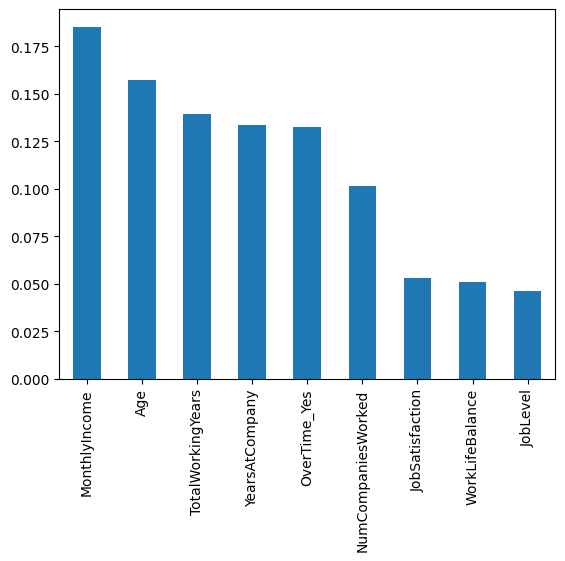

In [36]:
# Plot
feature_importance.head(10).plot(kind='bar')

The model indicates that overtime status and job satisfaction are the strongest predictors of attrition, followed by compensation and tenure-related variables. 
Employees working overtime with low satisfaction levels exhibit significantly higher predicted attrition probability, suggesting workload management and engagement as key retention levers.